## Obtain Part of Speech Data

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 18})


In [2]:
asdPOS = pd.read_csv("../confidential/ASD_POS_stats.csv")
controlsPOS = pd.read_csv("../confidential/controls_POS_stats.csv")

Eliminate the controls that were not matched with ASD blogs.  We oversampled controls, so now let's trim to just the pairwise matched control blogs.

In [3]:
matched_to_asd = pd.read_csv("../confidential/controls_matching.csv")
matched_to_asd = matched_to_asd.loc[matched_to_asd['matched_with'] >= 0]

In [4]:
controlsPOS = controlsPOS.loc[controlsPOS['blog_name'].isin(matched_to_asd['blog'])]

In [5]:
controlsPOS['word_count'].sum()

3941564

In [6]:
asdPOS['word_count'].sum()

3856577

## Calculate Proportions

We'll want to have the sum of all parts of speech to see proportions.

In [7]:
asdPOS['sum']=asdPOS.sum(axis=1)
asdPOS = asdPOS[asdPOS["sum"] != 0]

controlsPOS['sum']=controlsPOS.sum(axis=1)
controlsPOS = controlsPOS[controlsPOS["sum"] != 0]

We're interested particularly in pronouns and possessives: 

* personal pronouns (*he*, *I*) are represented by PRP
* possessive pronouns (*my*, *yours*) by PRP\$
* possessive endings (*Bob's*, *Akil's*, *brother's*) by POS
* wh-type pronouns (*who*, *whom*) by WP
* wh-type posessive pronouns (*whose*) by WP\$

In [8]:
pronouns_pos = ["POS", "PRP", "PRP$", "WP", "WP$","sum"]

Let's peek at what our POS data frames look like. Because the dollar sign causes problems in rendering Jupyter notebooks in GitHub, we'll replace it before proceeding.

In [9]:
asdPOS=asdPOS[pronouns_pos]
asdPOS=asdPOS.rename(columns={'POS' : 'possessive-endings','PRP': 'personal', 'PRP$': 'possessive', 'WP': 'wh-non-possessive', 'WP$': 'wh-possessive'})
asdPOS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum
0,10.0,17928.0,6795.0,2336.0,36.0,716455.0
1,NaN,768.0,358.0,113.0,1.0,31890.0
2,NaN,969.0,521.0,77.0,NaN,37169.0
3,NaN,4036.0,2355.0,654.0,5.0,207151.0
4,NaN,1245.0,521.0,223.0,8.0,56999.0


In [10]:
controlsPOS=controlsPOS[pronouns_pos]
controlsPOS=controlsPOS.rename(columns={'POS' : 'possessive-endings', 'PRP': 'personal', 'PRP$': 'possessive', 'WP': 'wh-non-possessive', 'WP$': 'wh-possessive'})
controlsPOS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum
6,NaN,5087.0,2704.0,555.0,8.0,182996.0
9,19.0,12191.0,5248.0,1346.0,12.0,460115.0
15,NaN,1719.0,622.0,200.0,NaN,54685.0
18,NaN,5465.0,2066.0,729.0,1.0,195831.0
30,3.0,4738.0,2867.0,593.0,4.0,245306.0


Let's create percentage-of-total columns.  Note that where NaN exists, there should be a count of 0, so let's fix that now, as well.

In [11]:
asdPOS = asdPOS.join(asdPOS.div(asdPOS['sum'], axis=0), rsuffix='_pct').fillna(0)
asdPOS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum,possessive-endings_pct,personal_pct,possessive_pct,wh-non-possessive_pct,wh-possessive_pct,sum_pct
0,10.0,17928.0,6795.0,2336.0,36.0,716455.0,0.000014,0.025023,0.009484,0.003260,0.000050,1.0
1,0.0,768.0,358.0,113.0,1.0,31890.0,0.000000,0.024083,0.011226,0.003543,0.000031,1.0
2,0.0,969.0,521.0,77.0,0.0,37169.0,0.000000,0.026070,0.014017,0.002072,0.000000,1.0
3,0.0,4036.0,2355.0,654.0,5.0,207151.0,0.000000,0.019483,0.011369,0.003157,0.000024,1.0
4,0.0,1245.0,521.0,223.0,8.0,56999.0,0.000000,0.021842,0.009141,0.003912,0.000140,1.0


In [12]:
controlsPOS = controlsPOS.join(controlsPOS.div(controlsPOS['sum'], axis=0), rsuffix='_pct').fillna(0)
controlsPOS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum,possessive-endings_pct,personal_pct,possessive_pct,wh-non-possessive_pct,wh-possessive_pct,sum_pct
6,0.0,5087.0,2704.0,555.0,8.0,182996.0,0.000000,0.027798,0.014776,0.003033,0.000044,1.0
9,19.0,12191.0,5248.0,1346.0,12.0,460115.0,0.000041,0.026496,0.011406,0.002925,0.000026,1.0
15,0.0,1719.0,622.0,200.0,0.0,54685.0,0.000000,0.031435,0.011374,0.003657,0.000000,1.0
18,0.0,5465.0,2066.0,729.0,1.0,195831.0,0.000000,0.027907,0.010550,0.003723,0.000005,1.0
30,3.0,4738.0,2867.0,593.0,4.0,245306.0,0.000012,0.019315,0.011687,0.002417,0.000016,1.0


## Visualization and Statistical Tests of Differences

### Personal Pronouns

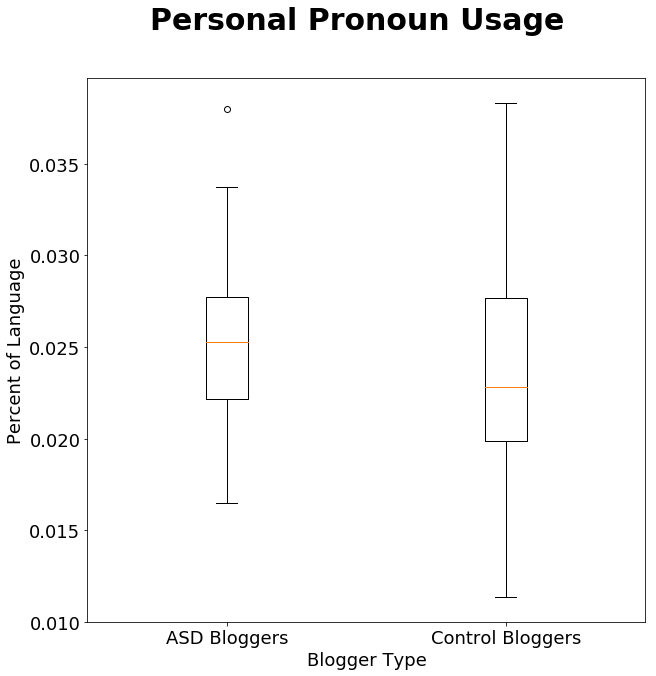

In [13]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Personal Pronoun Usage', fontsize=30, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["personal_pct"],controlsPOS["personal_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

It certainly seems as though there is a small difference, with ASD bloggers using more personal pronouns.  Is that the case, and is the difference statistically significant?

In [14]:
pct_diff = (asdPOS["personal_pct"].mean()/controlsPOS["personal_pct"].mean())*100-100

print("Mean Personal Pronoun Usage: ASD = " + 
      str(asdPOS["personal_pct"].mean()) +
     "; Controls = " + str(controlsPOS["personal_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)) + "% more personal pronouns.")
      

Mean Personal Pronoun Usage: ASD = 0.025346359630721963; Controls = 0.0237652893877489

Autistic Bloggers use 6.65% more personal pronouns.


In [15]:
ttest_ind(asdPOS["personal_pct"],controlsPOS["personal_pct"])

Ttest_indResult(statistic=1.7220332047482367, pvalue=0.087728876805519926)

There is a small difference, but it does not rise to the level of significance.

### Possessive Endings

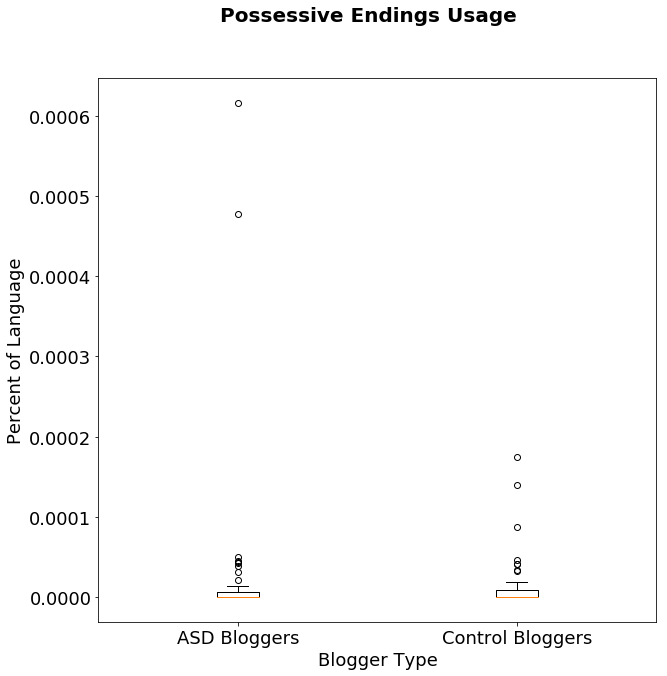

In [16]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Possessive Endings Usage', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["possessive-endings_pct"],controlsPOS["possessive-endings_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

Well, we have some interesting ASD outliers in the possessive endings area.  Still, it seems like possessive endings useage is essentially a tie.  Is that the case?

In [17]:
pct_diff = (asdPOS["possessive-endings_pct"].mean()/controlsPOS["possessive-endings_pct"].mean())*100-100

print("Mean Possessive Endings Usage: ASD = " + 
      str(asdPOS["possessive-endings_pct"].mean()) +
     "; Controls = " + str(controlsPOS["possessive-endings_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)) + "% more possessive endings.")

Mean Possessive Endings Usage: ASD = 2.458758773705427e-05; Controls = 1.2049271897962257e-05

Autistic Bloggers use 104.06% more possessive endings.


In [18]:
ttest_ind(asdPOS["possessive-endings_pct"],controlsPOS["possessive-endings_pct"])

Ttest_indResult(statistic=0.91556273236456542, pvalue=0.3617956606463073)

Yes, the difference is tiny (despite the proportional difference being large) and amounts to, statistically speaking, a tie.

### Possessive Pronouns

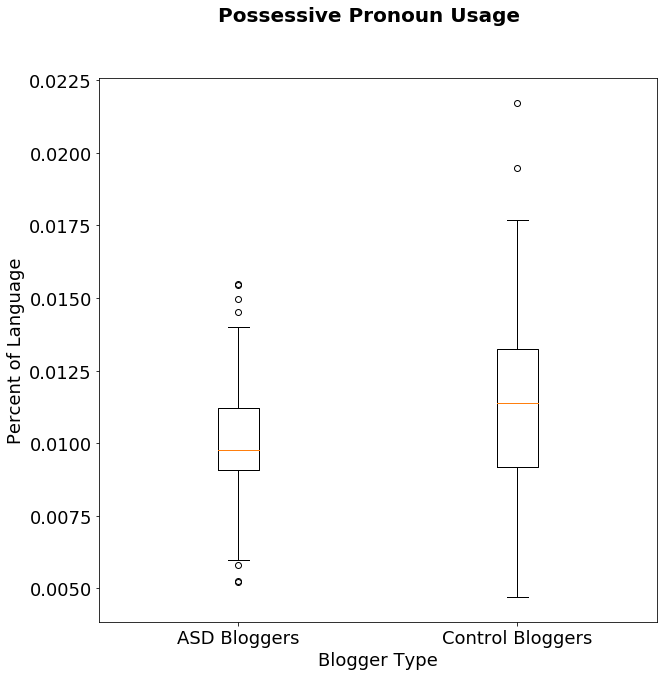

In [19]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Possessive Pronoun Usage', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["possessive_pct"],controlsPOS["possessive_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

Here we see that controls use more possessive pronouns than autistic bloggers.

In [20]:
pct_diff = (asdPOS["possessive_pct"].mean()/controlsPOS["possessive_pct"].mean())*100-100

print("Mean Possessive Pronoun Usage: ASD = " + 
      str(asdPOS["possessive_pct"].mean()) +
     "; Controls = " + str(controlsPOS["possessive_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)*-1) + "% fewer possessive endings.")

Mean Possessive Pronoun Usage: ASD = 0.010093226798055148; Controls = 0.011521372136672588

Autistic Bloggers use 12.4% fewer possessive endings.


In [21]:
ttest_ind(asdPOS["possessive_pct"],controlsPOS["possessive_pct"])

Ttest_indResult(statistic=-2.684834636838644, pvalue=0.0083197945090885718)

Here we have a clear finding: Autistic bloggers use 12.4% fewer possessive pronouns than control bloggers, at a p value of 0.0083.

### Wh Pronouns (Non-Possessive)

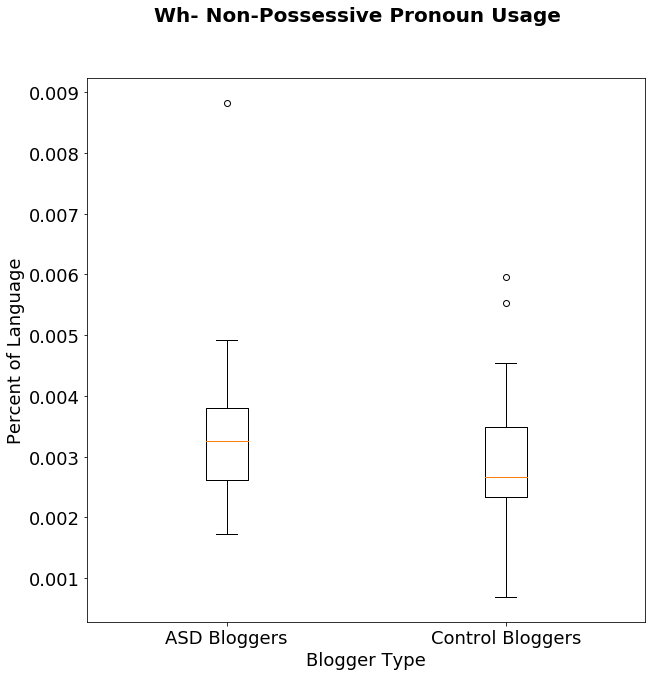

In [22]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Wh- Non-Possessive Pronoun Usage', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["wh-non-possessive_pct"],controlsPOS["wh-non-possessive_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

In [23]:
pct_diff = (asdPOS["wh-non-possessive_pct"].mean()/controlsPOS["wh-non-possessive_pct"].mean())*100-100


print("Mean Wh- Non-Possessive Pronoun Usage: ASD = " + 
      str(asdPOS["wh-non-possessive_pct"].mean()) +
     "; Controls = " + str(controlsPOS["wh-non-possessive_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)) + "% more wh- non-possessive pronouns.")

Mean Wh- Non-Possessive Pronoun Usage: ASD = 0.0033390046669999744; Controls = 0.0028628147259934455

Autistic Bloggers use 16.63% more wh- non-possessive pronouns.


In [24]:
ttest_ind(asdPOS["wh-non-possessive_pct"],controlsPOS["wh-non-possessive_pct"])

Ttest_indResult(statistic=2.5108614080392049, pvalue=0.013420754989194256)

Here we find that autistic bloggers use 16.63% more wh- non-possessive pronouns than control bloggers, at a p value of 0.0134

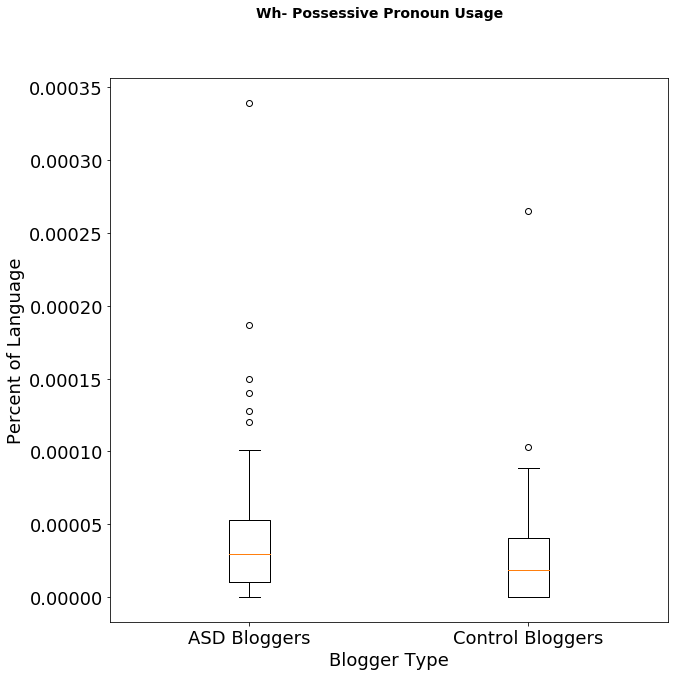

In [25]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Wh- Possessive Pronoun Usage', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["wh-possessive_pct"],controlsPOS["wh-possessive_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

In [26]:
pct_diff = (asdPOS["wh-possessive_pct"].mean()/controlsPOS["wh-possessive_pct"].mean())*100-100


print("Mean Wh- Possessive Pronoun Usage: ASD = " + 
      str(asdPOS["wh-possessive_pct"].mean()) +
     "; Controls = " + str(controlsPOS["wh-possessive_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)) + "% more Wh- possessive pronouns.")

Mean Wh- Possessive Pronoun Usage: ASD = 4.4872546321540246e-05; Controls = 2.7222023091442554e-05

Autistic Bloggers use 64.84% more Wh- possessive pronouns.


In [27]:
ttest_ind(asdPOS["wh-possessive_pct"],controlsPOS["wh-possessive_pct"])

Ttest_indResult(statistic=1.942320766997002, pvalue=0.054522288955226414)

While suggestive (p = 0.055), this does not rise to the level of statistical significance.